
<img align="left" style="padding-right:100px;" src="http://pvexpect.com/Driftsledelse/Dagligvarer/nmbu.png">

  **Digital Driftsledelse - IND210**

 Jesper Ørntoft Frausig, 2021


#Øvelse - Relationer

**[Introduksjon](#Introduksjon)**
- [Trin 1](#Trin_1) - Importer pandas
- [Trin 2](#Trin_2) - Database med relationer over kommuner og fylker,
- [Trin 3](#Trin_3) - Omnavngiv kolonner
- [Trin 4](#Trin_4) - Installere geopandas
- [Trin 5](#Trin_5) - Nedlast geografisk data
- [Trin 6](#Trin_6)  - Oppload geografisk data til Google Colab
- [Trin 7](#Trin_7) - Importere relevante bibliotekker 
- [Trin 8](#Trin_8) -  Åbn og forbedre geografisk data
- [Trin 9](#Trin_9) - Vis data på kort

**[Hva har jeg lært](#lærdom)**

**[Begreber](#Begreber)**

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

<a name="Introduksjon"></a>

#**Introduksjon**

Vi henter kommunedata og kart data og kryssrefererer datasett

> Hva vil du lære i følgende øvelse:
* [ ] Hvordan du importer pandas
* [ ] Hvordan du henter excel ark
* [ ] Hvordan du omnavngiver kolonner
* [ ] Hvordan du installerer geopandas
* [ ] Hvordan du nedlaster og opploader geografisk data
* [ ] Hvordan du importere relevante bibliotekker 
* [ ] Hvordan du åpner og forbereder geografisk data
* [ ] Hvordan du viser data på kort


<a name="Trin_1"></a>

##**Trin 1** - importer pandas


Først importeres pandas (vennligst sjekk [Hent bibliotekker](#Hent_bibliotekker_med_verktøyer) ), for a kunne anvende pandas bibliotekket til data analyse.


```
import pandas as pd
```



In [ ]:
import pandas as pd

<a name="Trin_2"></a>

##**Trin 2** - hent excel ark




Vi henter database med relationer over kommuner og fylker, som excel format (Sjekk vennligst [Excel](#Excel))

```
fylkedata=pd.read_excel("https://www.kartverket.no/globalassets/til-lands/kommunereform/fylker-kommuner-2019-2020-alle.xlsx")
```


database med relationer over kommuner og fylker

In [ ]:
fylkedata=pd.read_excel("https://www.kartverket.no/globalassets/til-lands/kommunereform/fylker-kommuner-2019-2020-alle.xlsx")

##**Trin 3** - omnavngiv kolonner


Vi omnavngiver alle kolonner (Sjekk vennligst [telle gjennom rader](#telle_gjennom_rader)) 

```
for column in fylkedata.columns:
```

De nye kolonnenavn har ikke "." i navnet, og er lettere at håndtere  (Sjekk vennligst [Omnavngiv](#Omnavngiv)) 

```
  fylkedata.rename(inplace=True, columns={column: column.replace(".","")})
```



In [ ]:
for column in fylkedata.columns:
  fylkedata.rename(inplace=True, columns={column: column.replace(".","").replace(" ","_")})
fylkedata

,Fylkesnr_2019,Fylkesnavn_2019,Kommunenr_2019,Kommunenavn_2019,Fylkesnr_2020,Fylkesnavn_2020,Kommunenr_2020,Kommunenavn_2020
0,1,ØSTFOLD,101,HALDEN,30,VIKEN,3001,HALDEN
1,1,ØSTFOLD,104,MOSS,30,VIKEN,3002,MOSS
2,1,ØSTFOLD,105,SARPSBORG,30,VIKEN,3003,SARPSBORG
3,1,ØSTFOLD,106,FREDRIKSTAD,30,VIKEN,3004,FREDRIKSTAD
4,1,ØSTFOLD,111,HVALER,30,VIKEN,3011,HVALER
...,...,...,...,...,...,...,...,...
420,50,TRØNDELAG,5051,NÆRØY,50,TRØNDELAG,5060,NÆRØYSUND
421,50,TRØNDELAG,5052,LEKA,50,TRØNDELAG,5052,LEKA
422,50,TRØNDELAG,5053,INDERØY,50,TRØNDELAG,5053,INDERØY
423,50,TRØNDELAG,5054,INDRE FOSEN,50,TRØNDELAG,5054,INDRE FOSEN


##**Trin 4:** - installere geopandas



Dernest installere vi geopandas (Sjekk vennligst [geopandas](#GeoPandas) ):

```
!pip install geopandas
```



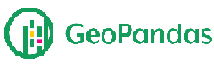

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.7MB/s 
     |████████████████████████████████| 14.8MB 300kB/s 
     |████████████████████████████████| 6.5MB 47.3MB/s 


##**Trin 5:** - nedlast geografisk data



Tryk på nedstående link, for at download filen kommuner_komprimeret.json:

https://github.com/smistad/konverter-norgeskart-projeksjon/releases/download/v2020/kommuner_komprimert.json




##**Trin 6:** - oppload geografisk data til Google Colab




Last deretter opp filen "kommuner_komprimeret.json"


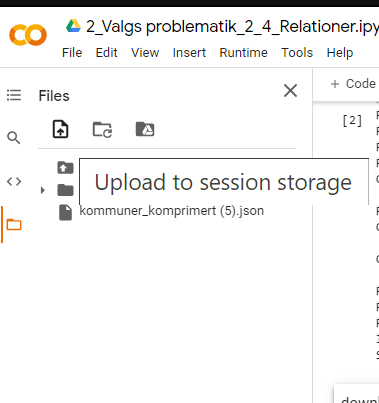

##**Trin 7:** - Importere relevante bibliotekker 


Importere relevante bibliotekker  (vennligst sjekk [Hent bibliotekker](#Hent_bibliotekker_med_verktøyer) )
```
import altair as alt
import pandas as pd
import geopandas as gpd
import json
```




åbn som geopandas

In [ ]:
import altair as alt
import pandas as pd
import geopandas as gpd
import json



,geometry,kommunenummer,objtype,lokalid,oppdateringsdato,datauttaksdato,versjonid,opphav,samiskforvaltningsomrade,datafangstdato,navnerom,navn
0,"POLYGON ((28.98103 70.40655, 29.05203 70.40828...",5405,Kommune,172718,None,20191220110340,4.1,None,False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,"[{'rekkefolge': '', 'sprak': 'nor', 'navn': 'V..."
1,"POLYGON ((4.54705 60.10405, 5.05288 60.14941, ...",4625,Kommune,172926,None,20191220110340,4.1,None,False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,"[{'rekkefolge': '', 'sprak': 'nor', 'navn': 'A..."
2,"POLYGON ((14.12563 67.94409, 14.78371 68.05597...",1848,Kommune,172744,None,20191220110340,4.1,None,False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,"[{'rekkefolge': '', 'sprak': 'nor', 'navn': 'S..."
3,"POLYGON ((15.07389 67.61695, 15.11372 67.63029...",1845,Kommune,172870,None,20191220110340,4.1,None,False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,"[{'rekkefolge': '', 'sprak': 'nor', 'navn': 'S..."
4,"POLYGON ((31.22260 70.64439, 31.54880 70.54528...",5404,Kommune,173014,None,20191220110340,4.1,None,False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,"[{'rekkefolge': '', 'sprak': 'nor', 'navn': 'V..."


##**Trin 8:** - Åbn og forbedre geografisk data




Refere til og åbn op filen "kommuner_komprimert.json"
```
with open(geo_json_file_loc) as json_data:
    data = json.load(json_data)
```



Når filen er åben, hentes egenskaperne ud af filen, som en geopandas data struktur.

```
gdf = gpd.GeoDataFrame.from_features(data, crs = "str")
```



In [ ]:
geo_json_file_loc= "kommuner_komprimert.json"
with open(geo_json_file_loc) as json_data:
    data = json.load(json_data)
gdf = gpd.GeoDataFrame.from_features(data, crs = "str")


Vi printer de øverste rader (vennligst sjekk [Øverste rader](#Les_de_øverste_radene) )


In [ ]:
gdf.head(5)

##**Trin 9:** - Vis data på kort






Vi importer altair bibliotekket

```
 import altair as alt
```

Nu kan vi vise dataene på et kort.

Dettte er princippet:
```
norway =alt.Chart(gdf).mark_geoshape ().
).encode().project()
```


Prøv at holde musen henover en lokation :)

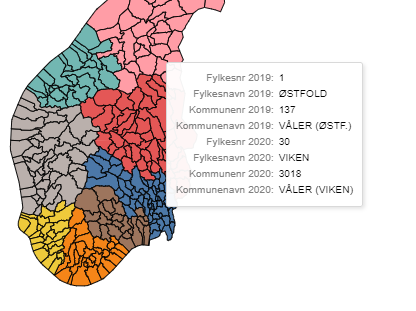

In [ ]:

norway =alt .  Chart ( gdf ) .  mark_geoshape (stroke= "black").transform_lookup(
    lookup='kommunenummer',
    from_=alt.LookupData(fylkedata, 'Kommunenr_2020', list(fylkedata.columns)) #list(fylkedata.drop(['Type matvare','fylkesnummer'],axis=1).columns)
).encode(
  color='Fylkesnavn_2020:N',
  tooltip=['Fylkesnr_2019:N','Fylkesnavn_2019:N','Kommunenr_2019:N','Kommunenavn_2019:N','Fylkesnr_2020:N','Fylkesnavn_2020:N','Kommunenr_2020:N','Kommunenavn_2020:N']

).project( #projektere visning background+
    type= 'mercator', #vælg projektering
    scale= 1300, #skalere visning
    center= [12,65],  #centere visning på følgende gps koordinate
) .  properties (
     width = 800 ,
     height = 800
)
norway #.save("relationer.html")

alt.Chart(...)

<a name="lærdom"></a>
#**Hva har jeg lært idag?**

> Hva har du lært?
* [x] Hvordan du importer pandas
* [x] Hvordan du henter excel ark
* [x] Hvordan du omnavngiver kolonner
* [x] Hvordan du installerer geopandas
* [x] Hvordan du nedlaster og opploader geografisk data
* [x] Hvordan du importere relevante bibliotekker 
* [x] Hvordan du åpner og forbereder geografisk data
* [x] Hvordan du viser data på kort

Hva vil du lære i morgen?

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

# **Begreber**




-- [Excel](#Excel)




##**Installere** - `pip install`


Pip install har flere trinn:

* Identifiser basiskravene få å installere biblitek.
* Løs avhengigheter. Hva som skal installeres bestemmes her.
* Håndtere avhengighetene. Alle avhengighetene som kan bygges inn i "hjul" eller på engelsk "wheels": Nødvendig biblitekker installeres i rekkefølge
* Installer pakkene (og avinstaller alt som blir oppgradert / erstattet).

Vær oppmerksom på å pipinstallasjon foretrekker å la den installerte versjonen være som den er.
For å oppgrader, kan du spesifisere --upgrade.





Her installere vi bibliotekket

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 12.9MB/s 
     |████████████████████████████████| 6.5MB 52.5MB/s 
     |████████████████████████████████| 14.8MB 323kB/s 


Her avinstallere vi bibliotekket

In [ ]:
!pip uninstall geopandas

Uninstalling geopandas-0.9.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/geopandas-0.9.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/geopandas/*
Proceed (y/n)? y
  Successfully uninstalled geopandas-0.9.0


**Spørsmål:**
> * For å installere programvare i Windows eller iOS, har du opplevd at programvaren var avhengig av annen programvare for å fungere?
>* Hvorfor er det viktigt å løse avhengigheter av bibliotekker?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>


<a name="Excel"></a>

##**Excel** - `.xlsx`

Excel anvendes av 800 millioner mennesker på verdensplan. Python anvendes av 8 millioner mennesker. Excel er stadig populært.
Excel anvender er et bestemmt filformat - .xls eller xlsx -  som må lese av Excel eller et Excel kompatible programmvare

Derfor kan vi ikke åpne Excel filer direkte i notepad, som ses forneden:
```
PK     ! gQê  ¼   [Content_Types].xml ¢(                                                                                                                                                                                                                                                                                        Ì–ËnÂ0E÷•ú‘·1Ðª,úX¶Hm?Àb‘Ø–g ð÷˜‚ªŠ‚HÍ&QâÌ½g&’¯ûÃEU&shœÍD'm‹lî´±“L¼¿=µz"ARV«ÒYÈÄPçgý·¥L¸Úb&
"'%æT
SçÁòÊØ…J?†‰ô*Ÿª	Èn»}#sg	,µ¨ÖƒþŒÕ¬¤äqÁ¯W$ÆŠä~õ]m•	å}irE*çVÿ2i¹ñØä ]>«X:E@i, ¨*S;†W âÆPÈ­žJ<Ìô»«”+#Æã·þ‡C½òwWßu/ü;‚ÑŒT gUqïrQÊO¦ÎMÓÝ"‡Ž&Ž(­”±kîþñc”ñÖ91HÝ_>£ÛŽË†p\5„ãº!7
```



Excel er organiseret i ark eller sheets. Et ark eller en tabel i et ark av Excel kan ses, som en data strukturer ligesom en Pandas dataframe:

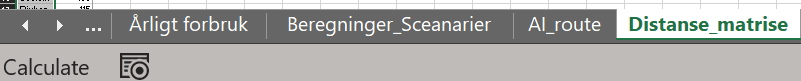






Vi henter database med relationer over kommuner og fylker, som excel format

```
fylkedata=pd.read_excel("https://www.kartverket.no/globalassets/til-lands/kommunereform/fylker-kommuner-2019-2020-alle.xlsx")
```

I det følgende vil vi hente en excel fil, som indholder data for relationer mellem geografiske områter.

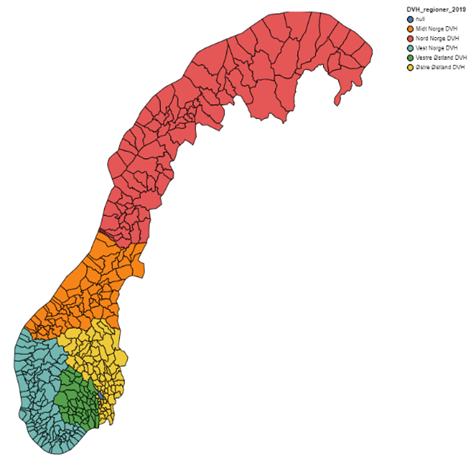

1.2.4 - Eksempel

Rå henting av data fil

In [ ]:
import requests 
response = requests.get('https://www.kartverket.no/globalassets/til-lands/kommunereform/fylker-kommuner-2019-2020-alle.xlsx') 
print(response.text[0:800]) 

��ӵL��b.j"�"%5�
3���N�B��?C%�*����=��YK)ub8x�R-J�W��Q23V$��sU.���)�P���I����]�h:C@i��m23�	�1� g�/#ݺʸ2
��x|`�G��㮶u_�;�ѐ�U


Korrekt henting av data fil

In [ ]:
pd.read_excel("https://www.kartverket.no/globalassets/til-lands/kommunereform/fylker-kommuner-2019-2020-alle.xlsx").head(3)

,Fylkesnr. 2019,Fylkesnavn 2019,Kommunenr. 2019,Kommunenavn 2019,Fylkesnr. 2020,Fylkesnavn 2020,Kommunenr. 2020,Kommunenavn 2020
0,1,ØSTFOLD,101,HALDEN,30,VIKEN,3001,HALDEN
1,1,ØSTFOLD,104,MOSS,30,VIKEN,3002,MOSS
2,1,ØSTFOLD,105,SARPSBORG,30,VIKEN,3003,SARPSBORG


<br></br>
>**Spørsmål**
>* Når driftsledere arbeider sammen, hvorfor bruker hver især ikke bare deres eget filformat? Excel? google sheets? open docs?
>* Har du oplevet å du ikke kunne åpne en Excel fil? 
>* Hvad er risikoen ved korrupte Excel filer?
<br></br>



<a name="Omnavngiv"></a>

 
##**Omnavngiv kolonne** - `.rename()`

`rename(inplace=True, columns={column: column)})`

De nye kolonnenavn har ikke "." i navnet, og er lettere at håndtere




> **Spørsmål**
> * Kan alle symboler brukes, som kolonnenavne?
> * Hvorfor kan bestemte symboler i kolonnenavne være et problem?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>



<a name="telle_gjennom_rader"></a>

##**Tell gjennom rader** - `for i in range(x,y):`


En løkke brukes for handlinger som bør gjentas flere ganger. Man kan velge et gitt antall ganger eller at det skal gjentas inntil et mål er nådd

Funksjonen angives vanligvis såledelse:
- `For i in loop`






En for loop brukes til å gjenta over en sekvens (det vil si en liste, en tuple, en ordbok, et sett eller en streng).

For eksempel, med for loop kan vi printe et sett med utsagn, en gang for hvert element i en liste, tuple, sett osv.


Referenser:

* Python for Finance, Yves Hilpisch, side 90-91 
* Python for Data analysis, Wes McKinney, side 47-49 


Først henter vi data, hvor vi vil anvende en for-løkke på

In [ ]:
import pandas as pd
fylkedata=pd.read_excel("https://www.kartverket.no/globalassets/til-lands/kommunereform/fylker-kommuner-2019-2020-alle.xlsx")

Dernest benytter vi en for løkke til å print kolonner av dataframen

In [ ]:
for column in fylkedata.columns:
  print(column)

Fylkesnr. 2019
Fylkesnavn 2019
Kommunenr. 2019
Kommunenavn 2019
Fylkesnr. 2020
Fylkesnavn 2020
Kommunenr. 2020
Kommunenavn 2020




> **Spørsmål**
> * Kan du tenke på processer fra hverdagen, hvor du anvender en løkke tilnærming til å løse et problem?
> * Hvorfor vil vi gjerne bearbeide et element av gangen fremfor hele serier?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>



<a name="Les_de_øverste_radene"></a>


**Les øverste eller sidste rader** - `.head()`


Denne funksjonen returnerer de første n radene for objektet basert på posisjon, angivet i parantes med et antal rader `n`. Det er nyttig å teste om objektet ditt har riktig type data.

-  `data.head(n)`

Dertil kan også anvendes negative verdier på `n`. Derved returnes alle radene unntatt de siste n radene.


Online kilde:

* [Les øverste eller sidste rader](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)



In [ ]:
import pandas as pd
data=pd.read_excel("https://www.kartverket.no/globalassets/til-lands/kommunereform/fylker-kommuner-2019-2020-alle.xlsx")

In [ ]:
data.head(6)

,Fylkesnr. 2019,Fylkesnavn 2019,Kommunenr. 2019,Kommunenavn 2019,Fylkesnr. 2020,Fylkesnavn 2020,Kommunenr. 2020,Kommunenavn 2020
0,1,ØSTFOLD,101,HALDEN,30,VIKEN,3001,HALDEN
1,1,ØSTFOLD,104,MOSS,30,VIKEN,3002,MOSS
2,1,ØSTFOLD,105,SARPSBORG,30,VIKEN,3003,SARPSBORG
3,1,ØSTFOLD,106,FREDRIKSTAD,30,VIKEN,3004,FREDRIKSTAD
4,1,ØSTFOLD,111,HVALER,30,VIKEN,3011,HVALER
5,1,ØSTFOLD,118,AREMARK,30,VIKEN,3012,AREMARK


<br></br>
> **Spørsmål**
> * Hvorfor udskriver du ikke bare alltid hele datasettet til skjermen?

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>


<a name="GeoPandas"></a>

##**GeoPandas** - `geopandas`
- `GeoPandas`

GeoPandas gjøre arbeidet med geospatiale data i python nemmere, på samme måte, som pandas hjelper med å arbeide med data strukturer.
GeoPandas kan foretage geospatiale operasjoner i pandas på et overordnet nivå. Derved lar GeoPandas deg enkelt utføre operasjoner i python. 

Geopandas har følgende funksjonaliteter:
* Håndtere datastrukturer
* Lese og skrive filer
* Indeksering og valg av data
* Lage kart og plott
* Administrere fremskrivninger
* Geometriske manipulasjoner
* Still operasjoner med overlegg
* Aggregering med oppløses
* Sammenslåing av data
* Geokoding

Online kilde:
* https://geopandas.org/




> **Spørsmål**
* Hvordan er Geopandas anderledes enn vanlig Pandas dataframes?
<br></br>
<br></br>
<br></br>
<br></br>






<a name="Pandas"></a>

##**Pandas** - `Pandas`
- `pandas`

Pandas er et programvarebibliotek skrevet for Python-programmeringsspråket for manipulering og analyse av data. 
Spesielt tilbyr den datastrukturer og operasjoner for å manipulere numeriske tabeller og tidsserier.


| DataFrame-objekt for databehandling med integrert indeksering.                                                                                                                        |
|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Verktøy for å lese og skrive data mellom datastrukturer i hukommelsen og forskjellige filformater.                                                                                    |
| Datajustering og integrert håndtering av manglende data.                                                                                                                              |
| Omforming av datasett.                                                                                                                                                                |
| Etikettbasert kutting, indeksering og delmengder av store datasett.                                                                                                                   |
| Innsetting og sletting av datakolonner.                                                                                                                                               |
| Gruppere datasett i bestemmt format                                                                                                                                                   |
| Datasett sammenslåing og sammenføyning.                                                                                                                                               |
| Hierarkisk indeksering for å arbeide med høydimensjonale data                                                                                                                         |
| Tidsseriefunksjonalitet: Generering av datoperiode og frekvenskonvertering, statistikk for bevegelige vinduer, lineære regresjoner i bevegelige vinduer, datoflytting og forsinkelse. |
| Datafiltrering.                                                                                                                                                                       |



Referenser:


s. 97, Python Data Science Handbook

s.  137-142, Python for Finance
[pandas dokumentation](https://pandas.pydata.org/)

<br></br>
>**Spørsmål:**
>* Hvorfor bruker vi Pandas til analyse av data?
>* Kan du give eksempler på funksjoner, som både Excel og Python kan løse?
>* Kjenner du funksjoner, som kan løses i Python eller, som er nemmere i Python fremfor Excel?
<br></br>

<a name="Hent_bibliotekker_med_verktøyer"></a>
###**Hent bibliotekker av verktøyer** - `Import` 
- `Import`

Python-kode i en modul får tilgang til koden i en annen modul ved å importere den. 
I Python er en modul en fil i .py-filformat som inneholder Python-kode.

Det mest populære bibliotek til data analyse er pandas. 
Pandas er en data struktur, litt likesom en tabel i Excel med rader og kolonner.

Import funksjonen kombinerer to operasjoner; den søker etter den navngitte modulen - `pandas` - , så binder den modulet til et navn, i dette eksempel `pd`.
Vanligvis foretrekker vi forekortelser, og importere bibliotekker, i forkortet form: `pandas as pd`. Fremover hetter bibliotekket `pd`

```
import pandas as pd
```

Genereltset importer vi funksjoner såledelse
```
import vårfunksjon
```

Alternativet til å importere funksjoner er å definere funksjonen direkte: 
```
def vårfunksjon():
  return x + 2
```


Referenser
* Python for Data Analysis, Wes McKinney, s. 36

**Eksempel** 

Åbning af nettlink med pandas. Filen er i json-format og har innebygde data

In [ ]:
import pandas as pd
pd.read_json("https://platform-rest-prod.ngdata.no/api/FindStore/StoresClosestToMe/1300/?latitude=65.4&longitude=16.8&minnumberofstores=200&maxNumberOfStores=300&maxDistance=2470554")

,distance,store
0,1,"{'id': 7080000918737, 'chainid': 1300, 'name':..."
1,1,"{'id': 7080001110611, 'chainid': 1300, 'name':..."
2,1,"{'id': 7080001100063, 'chainid': 1300, 'name':..."
3,1,"{'id': 7080000032075, 'chainid': 1300, 'name':..."
4,1,"{'id': 7080000001903, 'chainid': 1300, 'name':..."
...,...,...
174,1,"{'id': 7080000003280, 'chainid': 1300, 'name':..."
175,1,"{'id': 7080000062881, 'chainid': 1300, 'name':..."
176,1,"{'id': 7080000748273, 'chainid': 1300, 'name':..."
177,1,"{'id': 7080001007157, 'chainid': 1300, 'name':..."


**Spørsmål:**
>* Hvad betyder `import`?
>* Må vi vete på forhånd hvilke bibliotekker, som vi vil anvende, eller finder python selv ut av det?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>


#Midlertidigt

In [ ]:
fylkedata=pd.read_csv("https://raw.githubusercontent.com/jfrausig/test/master/fylker_kommuner_region_16.csv")

In [ ]:

norway =alt .  Chart ( gdf ) .  mark_geoshape (stroke= "black").transform_lookup(
    lookup='kommunenummer',
    from_=alt.LookupData(fylkedata, 'Kommunenr_2020', list(fylkedata.columns)) #list(fylkedata.drop(['Type matvare','fylkesnummer'],axis=1).columns)
).encode(
  color='DVH_regioner_2019:N',
  tooltip=['Fylkesnr_2019:N','Fylkesnavn_2019:N','Kommunenr_2019:N','Kommunenavn_2019:N','Fylkesnr_2020:N','Fylkesnavn_2020:N','Kommunenr_2020:N','Kommunenavn_2020:N']

).project( #projektere visning background+
    type= 'mercator', #vælg projektering
    scale= 1300, #skalere visning
    center= [16,65],  #centere visning på følgende gps koordinate
) .  properties (
     width = 800 ,
     height = 800
)
norway #.save("relationer.html")

alt.Chart(...)